 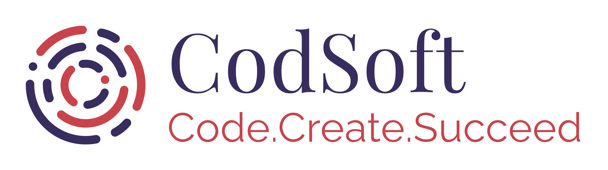

# **CodSoft - Data Science Internship**



## **`Author: Sai Charan Kanthuri Venkata`**
## **`Batch : SEPT BATCH A5`**
## **`Role: Data Science Intern`**
---



# **`Task 1 : Titanic Survival Prediction`**



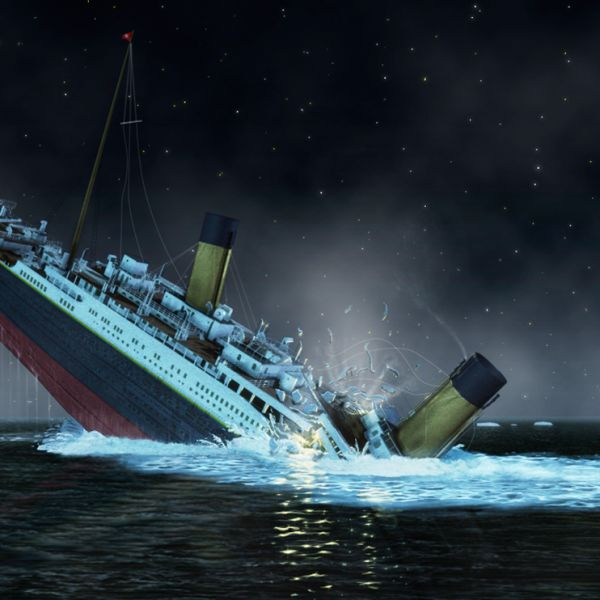

The main aim of this **Supervised Machine Learning model** is to predict and classify the survival of a person during the wrek of ship into sea. And Analyzing the Accuracy of prediction among some of the `classification` models


### `Objectives  :`


*  Visualize the patterns among the data  
*   Predict the Survival of person
*   Comparing accuracy on available classifiers
*   Conclusions


### `Steps followed to achieve desired outcome`
1. Import Required Modules and Data
2. Data Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Model Training
5. Accuracy among various models
6. Finding out best Classifier
7. Conclusion


### 1. Import Required Modules and Data


In [1]:
# For Data Manipulation
import numpy as np
import pandas as pd
# FOr EDA
import matplotlib.pyplot as plt
import seaborn as sns
# For Model Training
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#Importing Data
titanic_data=pd.read_csv("tested.csv")

### 2.Understanding Data

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Note :
    Checking all other columns so that we can identify the columns data structure and decide whether to use them for further process


In [8]:
titanic_data['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [9]:
titanic_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [10]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [11]:
titanic_data['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [12]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### 3. Data Cleaning

In [13]:
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Survived,0,0.0


In [14]:
#As Cabin data has 78.2% null values and seems we can't use data too. I opt to drop the data column
titanic_data.drop("Cabin",axis='columns',inplace=True)

In [15]:
#Age column to average null
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].min(),inplace=True)

In [16]:
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(8)

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [17]:
titanic_data['Ticket']=pd.to_numeric(titanic_data['Ticket'],errors='coerce')

In [18]:
titanic_data.shape

(418, 11)

In [19]:
df1 =titanic_data.drop_duplicates( subset= ['PassengerId'])

In [20]:
titanic_data.shape
#seems like every data is unique

(418, 11)

In [21]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       296 non-null    float64
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


In [22]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,2.960000e+02,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,2.238510e+05,35.541956
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,3.695238e+05,55.867684
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,6.800000e+02,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,1.747225e+04,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,2.301360e+05,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,3.470815e+05,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,3.101298e+06,512.329200


In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911.0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272.0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276.0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154.0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298.0,12.2875,S


#### **Insights :**
* FIrstly, Identiied number of Null and NaN values and based on percent,
* Then Dropped Cabin Column ,
* Then filled Age and Fare NaN Values column with average and Minimum values of their respective columns,
* Converted, all ticket column values to numeric,
* Checked for duplicate rows.

### 4. EDA

Text(0.5, 1.0, 'Survived vs Sex')

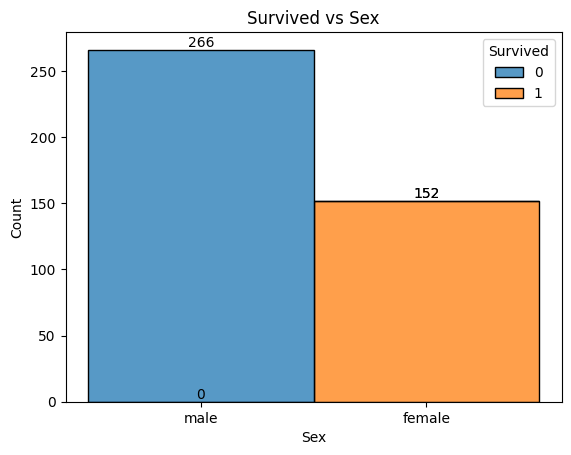

In [24]:
ax= sns.histplot(data=titanic_data,x ='Sex',hue='Survived',multiple='stack')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Survived vs Sex")

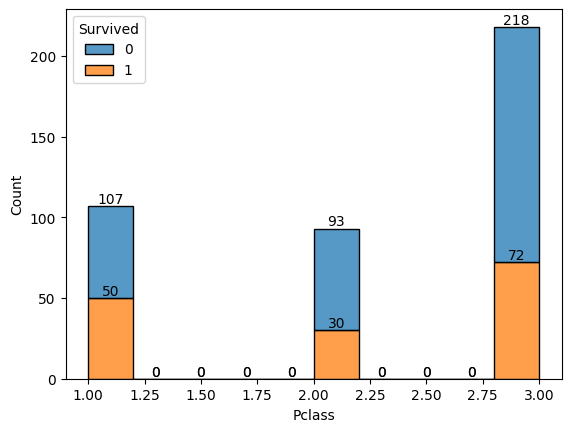

In [25]:
ax=sns.histplot(data=titanic_data,x='Pclass',hue='Survived',multiple='stack')
for i in ax.containers:
    ax.bar_label(i,)

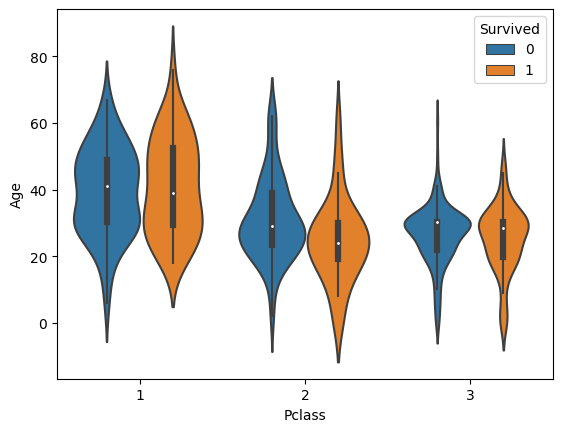

In [26]:
ax=sns.violinplot(data=titanic_data,x='Pclass',y='Age' ,hue='Survived')
for i in ax.containers:
    ax.bar_label(i,)

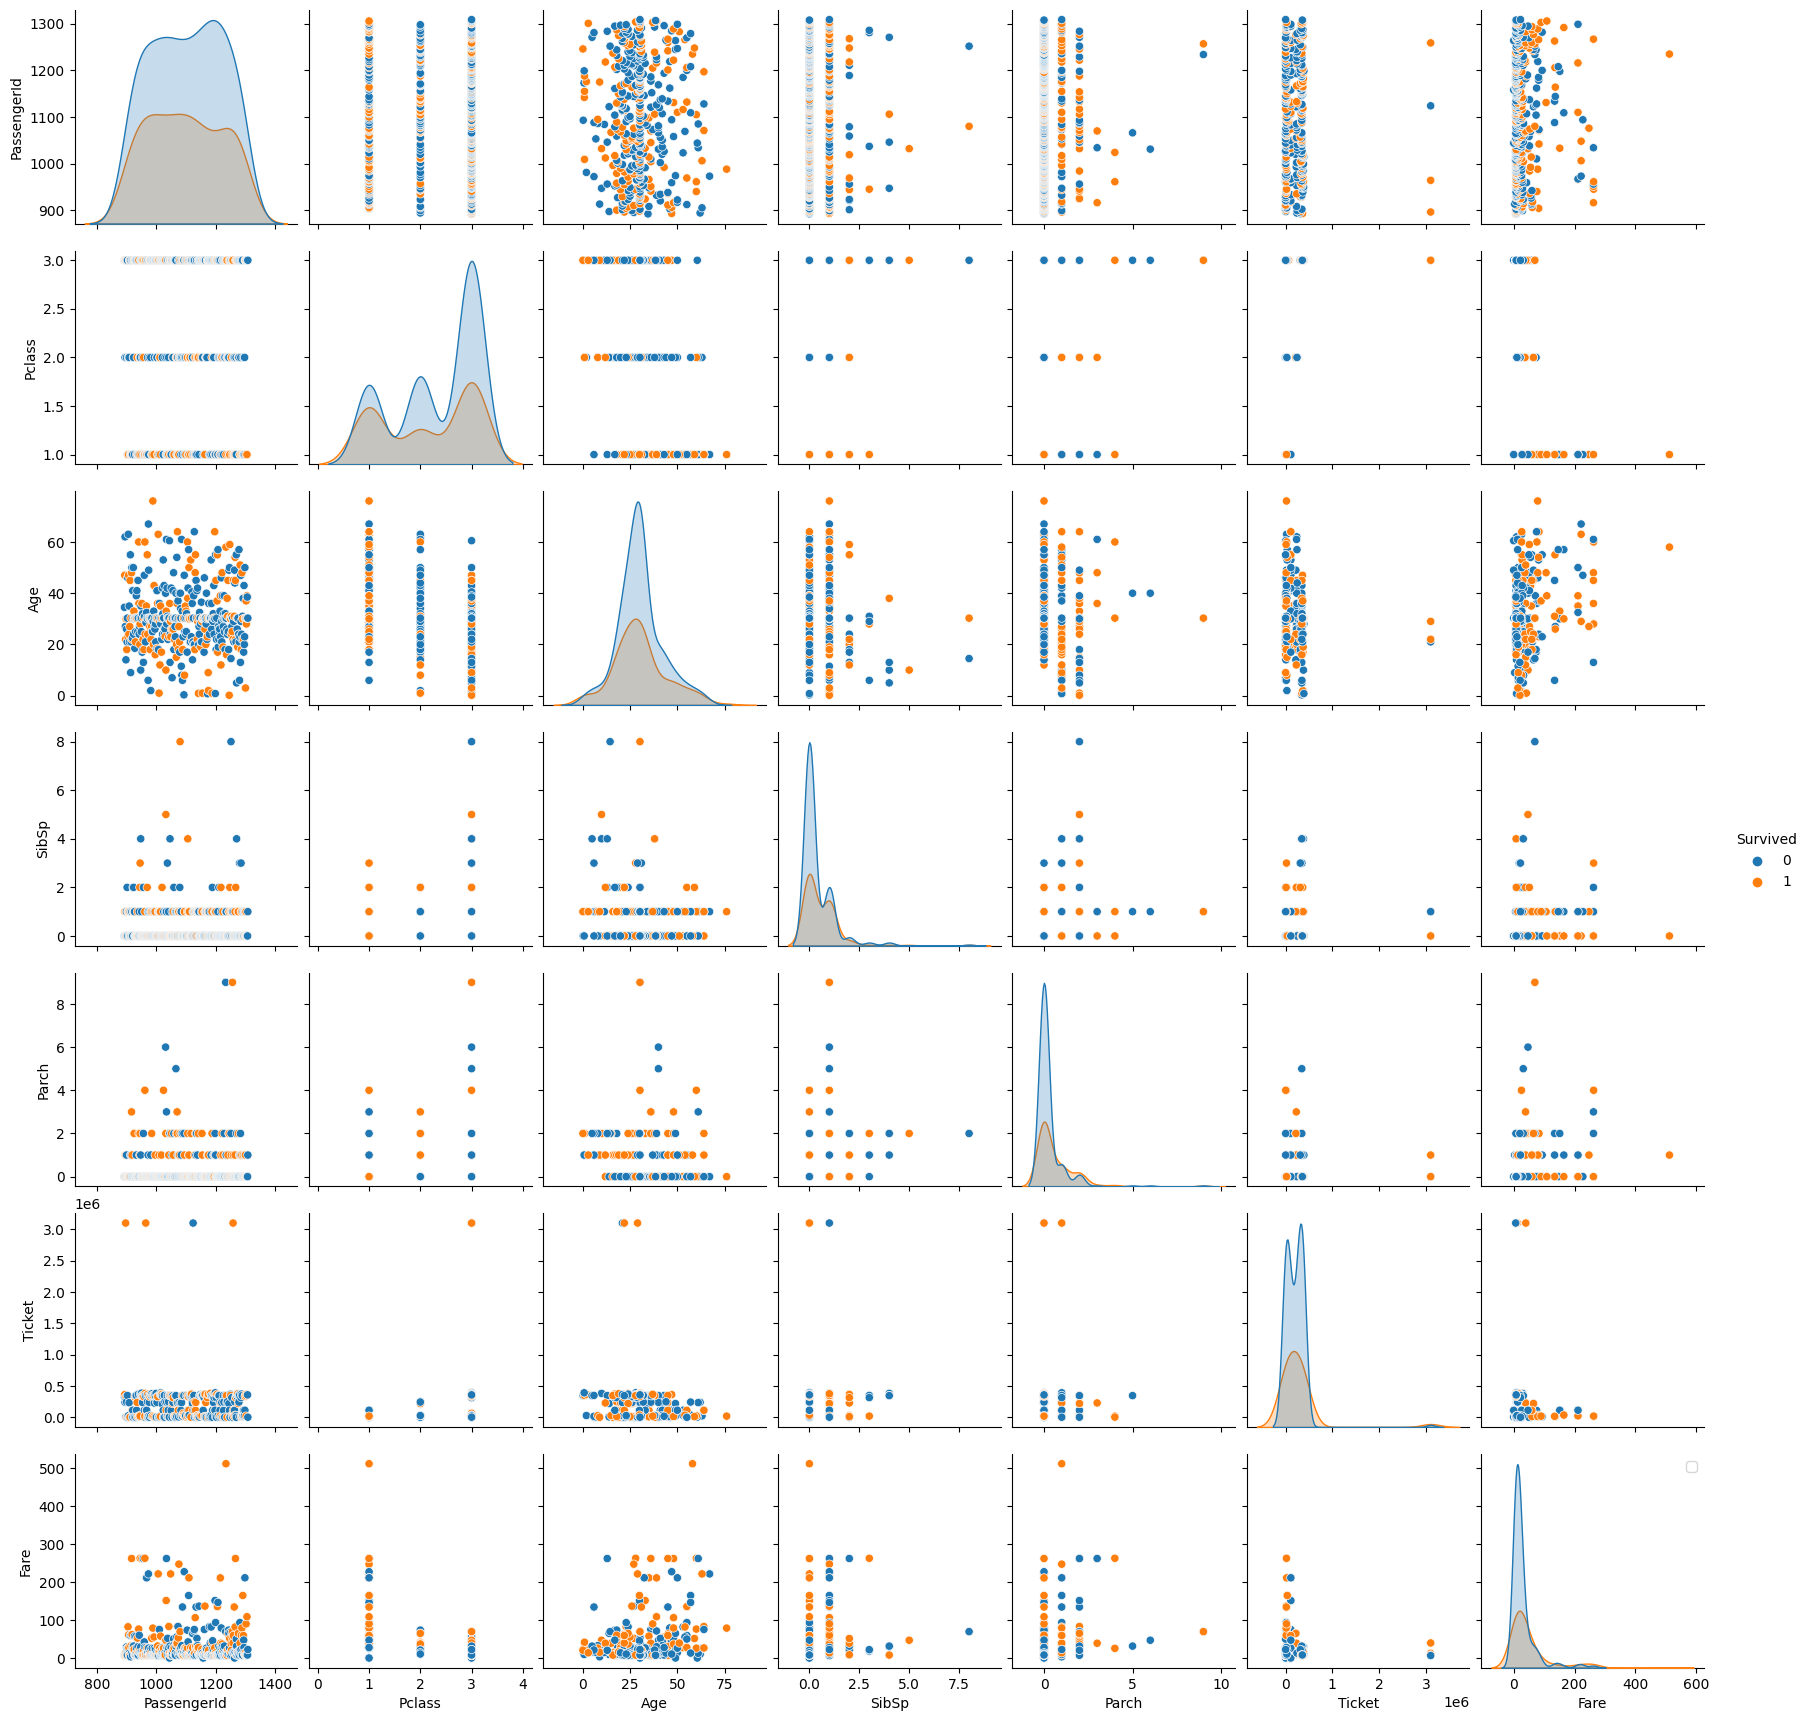

In [27]:
sns.pairplot(data=titanic_data,hue='Survived')
plt.legend()

#### **Insights :**
* Plotted plots based on survival.
* From first graph it is clearly understood males are dead in large number than females
* Second graph makes us understood that 3rd passenger class people are dead compared to others seems like ship crew gave priority to 2nd and 1st passenger class people.
* Third graph says most people who are onboard are in age group of 25-60 among all classes.
* Compared each component with each other component in dataset and gain insights.

### 5. Model Training

Selected `Feature` columns and `Target` columns and trained and splitted the dataset.

In [28]:
#Selecting features and Target
X=titanic_data.drop(["Survived","Sex","Name",'Ticket','Embarked'],axis=1)
y=titanic_data['Survived']

In [29]:
X_train, X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare
336,1228,2,32.00000,0,0,13.0000
31,923,2,24.00000,2,0,31.5000
84,976,2,30.27259,0,0,10.7083
287,1179,1,24.00000,1,0,82.2667
317,1209,2,19.00000,0,0,10.5000
...,...,...,...,...,...,...
71,963,3,21.00000,0,0,7.8958
106,998,3,21.00000,0,0,7.8208
270,1162,1,46.00000,0,0,75.2417
348,1240,2,24.00000,0,0,13.5000


In [31]:
Y_test

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64

###  6. Accuracy

##### As it is a classification model, we tried with some of most prominent Classification algorithms to find which classifier is best.

### `I. Random Forest Classifier`

In [32]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### `II. Logistic Regression`

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)


### `III. K Nearest Neighbours`

In [34]:
 knn = KNeighborsClassifier(n_neighbors = 3)
 knn.fit(X_train, Y_train)
 Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)



### `IV. Gaussian Naives`



In [35]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)


### `V. Support Vector Machine`






In [36]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(




### `VI. Decision Tree Classifier`



In [37]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### **Finding out which classifier is based on accuracy**

In [38]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian,
               acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
77.25,KNN
65.87,Naive Bayes
65.27,Logistic Regression
35.33,Support Vector Machines


<Axes: xlabel='Score', ylabel='Model'>

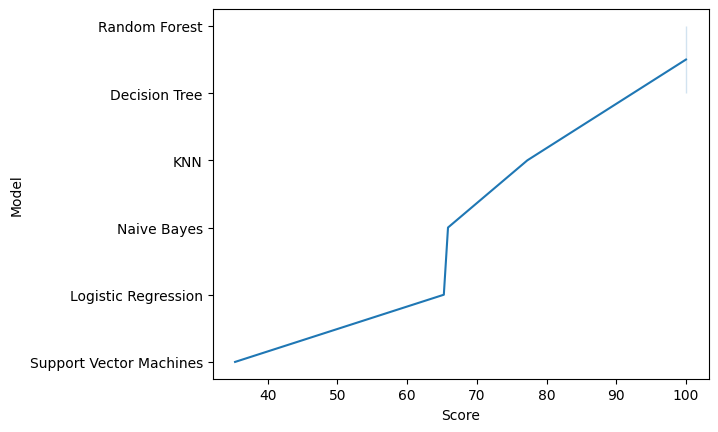

In [42]:
sns.lineplot(y='Model',x='Score',data=result_df)

# 7.Conclusion



1. **People Who died the most are males.**
2. **People Mostly died are from passenger class 3 followed  by class 2 and class 1.**
3. **And almost on boarded people are in age group of 20-60.**
4. **Identified `Random Forest` and `Decision Tree Classifiers` as best algorithms based on accuracy for given dataset.**
### **Note:**
###### ***1. Accuracy might based on testing and training size.***
###### ***2. Trying more avaliable classifiers and check accuracy for better insights***



# ***THANK YOU 😀***
# ***Happy a nice day***